# Résolution d'équations non linéaires

Importation des packages de calcul scientifique pour Python 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


Dans ce TP, on va mettre en oeuvre les méthodes vues en cours pour la résolution d'équations non linéaires du type

$$
F(x) = 0,
$$

où $F$ est une fonction de $\mathbb{R}$ dans $\mathbb{R}$. Ces méthodes sont au nombre de 3: la méthode de dichotomie, la méthode du point fixe et la méthode de Newton. Nous allons nous intéresser au cas où la fonction $F$ est donnée par

$$
F(x) = 10^{-1}x^2 - \cos(x/2)-e^{-x/4}.
$$

## Graphe de $F$ et localisation grossière des racines

Afin de se faire une idée de la fonction (et de ses racines), on se propose tout d'abord de tracer le graphe de $F$. Pour cela, on commence par implémenter la fonction $F$ qui prendra en entrée un vecteur $x$ et donnera en sortie un vecteur $y$ de même taille que $x$ et tel que, pour tout indice $k$,

$$
y_k = F(x_k).
$$

Ensuite, on trace le graphe de $F$ à l'aide de la fonction `plt.plot` sur l'intervalle $[-10,10]$ avec un millier de points.

> **À faire **: Implémenter la fonction $F$ et tracer son graphe. Donner un intervalle de longueur $1$ autour de chaque racine $F$ dans l'intervalle $[-10,10]$.

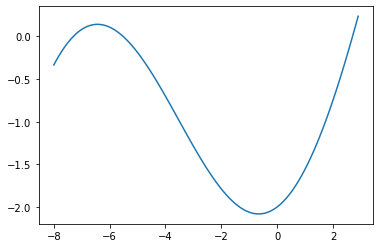

In [2]:
def F(x):
    return 0.1*(x**2)-np.cos(x/2.)-np.exp(-x/4.)
x = np.arange(-8, 3, 0.1)
plt.plot(x, F(x))

> **Réponse **:...

## Méthode de dichotomie

On passe maintenant au calcul de racines par la méthode de dichotomie. Pour cela, on va implémenter une fonction `Dichotomie` qui aura comme arguments d'entrée:

- une fonction `F` dont on cherche une racine,
- un scalaire `a` et un scalaire `b` pour définir l'intervalle initial,
- un scalaire `eps` pour le critère d'arrêt (qui aura, par défaut, la valeur $10^{-10}$),
- un entier `itermax` pour le nombre maximal d'itérations (qui aura, par défaut, la valeur $100$),

et comme arguments de sortie:

- un vecteur `X` qui contient la suite $(x_k)_{0\leq j\leq k}$ construite par la méthode et dont le dernier élément est l'approximation d'une racine de `F`,
- un entier `k` correspondant au nombre total d'itérations réalisées.

> **À faire **: Implémenter la méthode de la dichotomie. Tester celle-ci sur la fonction $F$ avec comme intervalle initial $[-10,10]$ puis calculer la plus grande racine de $F$ sur l'intervalle $[-10,10]$ à une précision de $10^{-12}$.

In [4]:
def Dichotomie(F, a, b, eps = 1e-12, itermax = 100):
    fa = F(a)
    fb = F(b)
    k = 0
    X = []
    if fa*fb<0 : 
        while abs(b-a)>2*eps and k<=itermax : 
            X = X + [(a+b)/2]
            fx = F(X[k])
            if fa*fx<0 : 
                b = X[k]
            else : 
                a = X[k] 
                fa = fx
            k = k+1
    else :
        print("Erreur fa*fb>0")
    return X,k
print(Dichotomie(F, -10, 10))

([0.0, 5.0, 2.5, 3.75, 3.125, 2.8125, 2.65625, 2.734375, 2.6953125, 2.71484375, 2.705078125, 2.7001953125, 2.69775390625, 2.698974609375, 2.6995849609375, 2.69927978515625, 2.699127197265625, 2.6992034912109375, 2.6992416381835938, 2.699260711669922, 2.699270248413086, 2.699275016784668, 2.699277400970459, 2.6992762088775635, 2.6992756128311157, 2.699275314807892, 2.699275463819504, 2.699275389313698, 2.699275426566601, 2.6992754451930523, 2.699275454506278, 2.699275459162891, 2.6992754614911973, 2.6992754626553506, 2.699275462073274, 2.6992754617822357, 2.699275461927755, 2.6992754618549952, 2.6992754618186154, 2.6992754618368053, 2.6992754618459003, 2.699275461841353, 2.6992754618436265, 2.6992754618424897], 44)


## Méthode du point fixe

À présent, on va implémenter la méthode du point fixe. On implémentera pour cela une fonction `Point_fixe` qui aura comme arguments d'entrée:
- une fonction `F` dont on cherche une racine,
- une fonction `Fp` correspondant à la dérivée de `F`,
- un scalaire `x_0` correspondant à la valeur initial de la méthode,
- un scalaire `a` et un scalaire `b` pour définir l'intervalle où évaluer la dérivée,
- un scalaire `eps` pour le critère d'arrêt (qui aura, par défaut, la valeur $10^{-10}$),
- un entier `itermax` pour le nombre maximal d'itérations (qui aura, par défaut, la valeur $100$),

et comme arguments de sortie:

- un vecteur `X` qui contient la suite $(x_k)_{0\leq j\leq k}$ construite par la méthode et dont le dernier élément est l'approximation d'une racine de `F`,
- un entier `k` correspondant au nombre total d'itérations réalisées.

> **À faire **: Calculer la dérivée de la fonction $F$ et implémenter sous une fonction `Fp`. Puis implémenter la méthode du point fixe. Cette méthode peut s'écrire sous la forme suivante
$$
\left\{\begin{array}{ll}
x_0\in I = [a,b]\textrm{ tel que la racine recherchée est dans $I$ et $F$ est monotone sur $I$},\\
M = \left\{\begin{array}{ll}\sup_{y\in I} F'(y),\textrm{ si $F$ est croissante sur $I$}\\\\inf_{y\in I} F'(y),\textrm{ si $F$ est décroissante sur $I$}
\end{array}\right.\\
x_{k+1} = x_k - \frac{F(x_k)}{M},\quad k\geq 0.
\end{array}\right.
$$

In [19]:
def Fp(x):
    return 2*0.1*x+0.5*np.sin(x/2.)+0.25*np.exp(-x/4.)

"""
AUTRE VERSION : celle d'en bas est plus efficace
def Point_fixe(F, Fp, x_0, a, b, eps = 1e-15, itermax = 100):
    k = 0
    x = np.arange(a, b, 0.01)
    y = Fp(x)
    X = [x_0]
    
    if x_0<a or x_0>b : 
        print("Erreur x0 n'est pas dans l'intervalle")
    else : 
        if F(a)*F(b)>0 : 
            M = max(y)
            while k<=100 : 
                x_1 = X[k]+(F(X[k])/M)
                if abs(x_1-X[k])<eps*abs(X[k]) : 
                    break 
                X = X+[x_1]
                k = k+1
        else : 
            M = min(y)
            while k<=100 : 
                x_1 = X[k]-(F(X[k]/M))
                if abs(x_1-X[k])<eps*abs(X[k]) : 
                    break 
                X = X+[x_1]
                k = k+1
            
    return X,k
"""

def Point_fixe(F, Fp, x_0, a, b, eps = 1e-10, itermax = 100):
    vect = np.linspace(a,b,1000)
    sup = np.max(Fp(vect))
    inf = np.min(Fp(vect))
    x = x_0
    if inf*sup<0:
        print("Non monotone")
        return None,None
    k=0
    crit=2*eps
    X=[x_0]
    M= sup if sup>0 else inf
    while k<=itermax and crit>eps:
        k+=1
        x_old = x
        x+= - F(x)/M
        crit=abs(x-x_old)/abs(x_old) if not x_old==0 else abs((x-x_old))
        X.append(x)
    return np.array(X),k

print(Point_fixe(F, Fp, 0, 0, 5))

(array([0.        , 1.4565658 , 2.35159118, 2.63365848, 2.68849924,
       2.69755431, 2.69900183, 2.69923199, 2.69926856, 2.69927437,
       2.69927529, 2.69927543, 2.69927546, 2.69927546, 2.69927546,
       2.69927546]), 15)


> **À faire **:  Ensuite, tester la méthode du point fixe sur la fonction $F$ avec comme valeur initiale $0$ et sur l'intervalle $[0,5]$.

## Méthode de Newton

On passe enfin à la méthode de Newton. On implémentera pour cela une fonction `Newton` qui aura comme arguments d'entrée:
- une fonction `F` dont on cherche une racine,
- une fonction `Fp` qui correspond à la dérivée de `F`,
- un scalaire `x_0` correspondant à la valeur initial de la méthode,
- un scalaire `eps` pour le critère d'arrêt (qui aura, par défaut, la valeur $10^{-10}$),
- un entier `itermax` pour le nombre maximal d'itérations (qui aura, par défaut, la valeur $100$),

et comme arguments de sortie:

- un vecteur `X` qui contient la suite $(x_k)_{0\leq j\leq k}$ construite par la méthode et dont le dernier élément est l'approximation d'une racine de `F`,
- un entier `k` correspondant au nombre total d'itérations réalisées.

> **À faire **: Implémenter la méthode de Newton. Tester cette dernière avec comme condition initiale $x_0 = -3$.

In [20]:
"""
AUTRE VERSION : celle d'en bas est plus éficace
def Newton(F, Fp, x_0, eps = 1e-15, itermax = 100):
    k = 0
    X = [x_0]
    x = x_0
    crit = 2*eps
    while k<=itermax and crit>eps : 
        k+=1
        x_old = x
        x+= - F(x)/Fp(x)
        crit=abs(x-x_old)/abs(x_old) if not x_old==0 else abs((x-x_old))
        X.append(x)
    return X,k
print(Newton(F, Fp, 1))
"""

def Newton(F, Fp, x_0, eps = 1e-10, itermax = 100):
    k=0
    crit=2*eps
    x=x_0
    X=[x_0]
    while k<=itermax and crit>eps:
        k+=1
        x_old = x
        x+= - F(x)/Fp(x)
        crit=abs(x-x_old)/abs(x_old) if not x_old==0 else abs((x-x_old))
        X.append(x)
    return np.array(X),k
X,k = Newton(F,Fp,1)
print(X)
print(k)

[1.         3.45326535 2.73549419 2.69939968 2.69927546 2.69927546
 2.69927546]
6


## Comparaison des méthodes

Dans cette dernière section, on va comparer les méthodes et notamment la vitesse de convergence de celle-ci. Tout d'abord, on va calculer chacune des racines de $F$ avec une précision de $10^{-15}$ à l'aide de la méthode de votre choix. On note $x^*_i$ la $i$-ème racine de $F$ obtenue de cette manière. Ensuite, on va tracer l'évolution, pour chaque méthode et pour chaque racine de $F$, de l'erreur:

$$
e_n^{(k)} = \log_{10} (|x_n-x_k^*|),
$$
pour $n$ allant de $0$ jusqu'au nombre total d'itérations de chaque méthode. 


> **À faire **: Tracer, pour chaque racine, l'évolution de $e_n^{(k)}$ pour chaque méthode sur un même graphique. Les conditions initiales seront $x_0 = -7, -5$ et $2$. Pour la méthode de la dichotomie, on commencera avec un intervalle de taille $1$ tel que $a$ ou $b$ est égal à $x_0$. L'évaluation du paramètre $M$ pour la méthode du point fixe se fera sur le même intervalle que l'intervalle de départ de la dichotomie. Le paramètre `eps` sera fixé à $10^{-12}$. Commenter le résultat.

[2.         2.61374831 2.69424822 2.69901762 2.69926235 2.6992748
 2.69927543 2.69927546 2.69927546 2.69927546 2.69927546] 10
[2.5, 2.75, 2.625, 2.6875, 2.71875, 2.703125, 2.6953125, 2.69921875, 2.701171875, 2.7001953125, 2.69970703125, 2.699462890625, 2.6993408203125, 2.69927978515625, 2.699249267578125, 2.6992645263671875, 2.6992721557617188, 2.6992759704589844, 2.6992740631103516, 2.699275016784668, 2.699275493621826, 2.699275255203247, 2.6992753744125366, 2.6992754340171814, 2.699275463819504, 2.6992754489183426, 2.699275456368923, 2.6992754600942135, 2.6992754619568586, 2.699275461025536, 2.6992754614911973, 2.699275461724028, 2.6992754618404433, 2.699275461898651, 2.699275461869547, 2.6992754618549952] 36


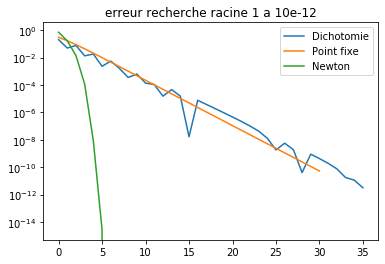

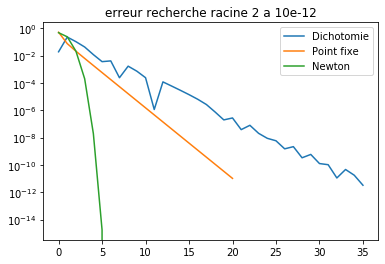

[ 9.79917909 10.04917909  9.92417909  9.98667909 10.01792909 10.00230409
  9.99449159  9.99839784 10.00035097  9.99937441  9.99888613  9.99864198
  9.99851991  9.99845888  9.99842836  9.99844362  9.99845125  9.99845506
  9.99845316  9.99845411  9.99845459  9.99845435  9.99845447  9.99845453
  9.99845456  9.99845454  9.99845455  9.99845455  9.99845456  9.99845455
  9.99845456  9.99845456  9.99845456  9.99845456  9.99845456  9.99845456] [9.29917909 9.91292741 9.99342731 9.99819671 9.99844144 9.99845389
 9.99845452 9.99845455 9.99845456 9.99845456 9.99845456]


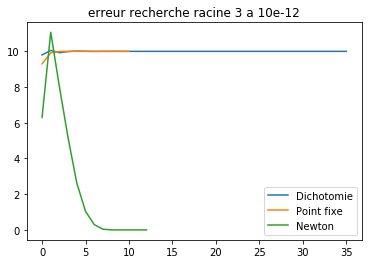

In [21]:
racine1,k1 = Newton(F,Fp,-8,10e-15)
racine2,k2 = Newton(F,Fp,-6,10e-15)
racine3,k3 = Newton(F,Fp,-1,10e-15)
r1=racine1[-1]
r2=racine2[-1]
r3=racine3[-1]


X_dicho_r1,k_dicho_r1 = Dichotomie(F,-8,-7,10e-12)
X_dicho_r2,k_dicho_r2 = Dichotomie(F,-6,-5,10e-12)
X_dicho_r3,k_dicho_r3 = Dichotomie(F,2,3,10e-12)

X_ptfixe_r1,k_ptfixe_r1 = Point_fixe(F,Fp,-7,-8,-7,10e-12)
X_ptfixe_r2,k_ptfixe_r2 = Point_fixe(F,Fp,-5,-6,-5,10e-12)
X_ptfixe_r3,k_ptfixe_r3 = Point_fixe(F,Fp,2,2,3,10e-12)
print(X_ptfixe_r3,k_ptfixe_r3)
print(X_dicho_r3,k_dicho_r3 )

## Ensuite faire des plots avec l'erreur

plt.semilogy(abs(r1-X_dicho_r1), label="Dichotomie")
plt.semilogy(abs(r1-X_ptfixe_r1), label="Point fixe")
plt.semilogy(abs(r1-racine1), label="Newton")
plt.legend()
plt.title("erreur recherche racine 1 a 10e-12")
plt.show()

plt.semilogy(abs(r2-X_dicho_r2), label="Dichotomie")
plt.semilogy(abs(r2-X_ptfixe_r2), label="Point fixe")
plt.semilogy(abs(r2-racine2), label="Newton")
plt.legend()
plt.title("erreur recherche racine 2 a 10e-12")
plt.show()


plt.plot(abs(r3-X_dicho_r3), label="Dichotomie")
plt.plot(abs(r3-X_ptfixe_r3), label="Point fixe")
plt.plot(abs(r3-racine3), label="Newton")
print(abs(r3-X_dicho_r3),abs(r3-X_ptfixe_r3))
plt.legend()
plt.title("erreur recherche racine 3 a 10e-12")
plt.show()